In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 103 GB / percent used: 18.0 %


In [14]:
# Open a dataarray
da = xr.open_dataarray('spatial_data.nc')
da

<xarray.DataArray 'snowc' (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    time     datetime64[ns] ...
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean


<IPython.core.display.Javascript object>


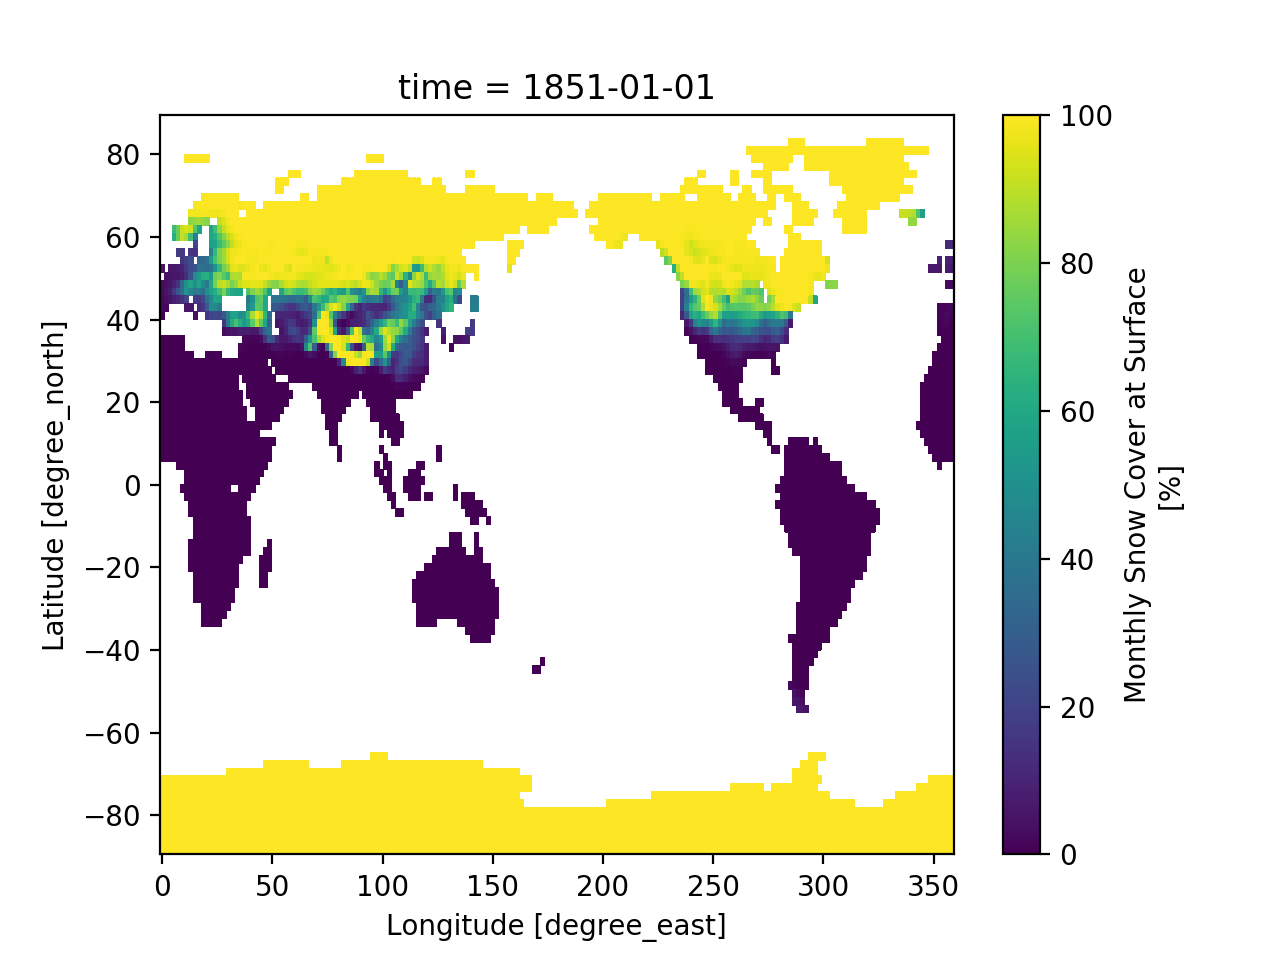

In [15]:
plt.figure()
da.plot()

## Spatial average

### Not weighted

In [26]:
(da.mean()).values

array(63.031166, dtype=float32)

### Compute the weights

In [27]:
(u.spatial_average(da)).values

array(39.736206, dtype=float32)

### Check with CDO

In [28]:
!cdo -fldmean spatial_data.nc spatial_mean.nc

cdo fldmean:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo fldmean: Processed 18048 values from 1 variable over 1 timestep [0.07s 194MB]


In [30]:
(xr.open_dataarray('spatial_mean.nc')).values

array([[39.732254]], dtype=float32)

## Check the weights

In [31]:
coslat = np.cos(np.deg2rad(da.lat)).where(~da.isnull())
weights = coslat / coslat.sum(dim=('lat', 'lon'))
np.testing.assert_allclose(weights.sum(dim=('lat','lon')).values, np.ones(da.time.size))

<IPython.core.display.Javascript object>


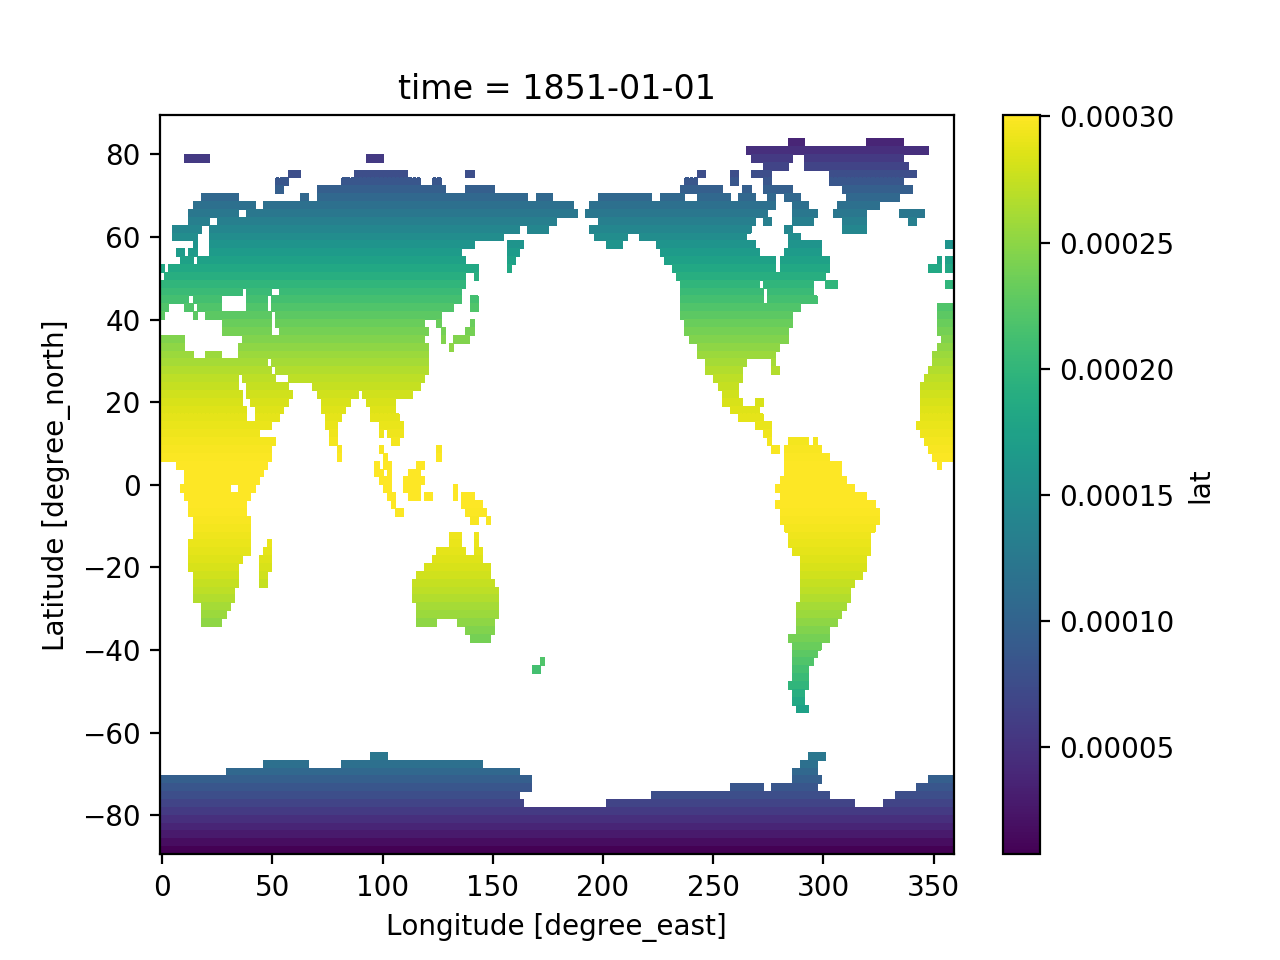

In [32]:
plt.figure()
weights.plot()

In [33]:
!cdo gridarea spatial_data.nc spatial_area.nc

cdo gridarea:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo gridarea: Processed 1 variable [0.06s 203MB]


In [34]:
cdo_area = xr.open_dataarray('spatial_area.nc')
cdo_area

<xarray.DataArray 'cell_area' (lat: 94, lon: 192)>
array([[1.167311e+09, 1.167311e+09, 1.167311e+09, ..., 1.167311e+09,
        1.167311e+09, 1.167311e+09],
       [2.565523e+09, 2.565523e+09, 2.565523e+09, ..., 2.565523e+09,
        2.565523e+09, 2.565523e+09],
       [4.030024e+09, 4.030024e+09, 4.030024e+09, ..., 4.030024e+09,
        4.030024e+09, 4.030024e+09],
       ...,
       [4.030024e+09, 4.030024e+09, 4.030024e+09, ..., 4.030024e+09,
        4.030024e+09, 4.030024e+09],
       [2.565523e+09, 2.565523e+09, 2.565523e+09, ..., 2.565523e+09,
        2.565523e+09, 2.565523e+09],
       [1.167311e+09, 1.167311e+09, 1.167311e+09, ..., 1.167311e+09,
        1.167311e+09, 1.167311e+09]])
Coordinates:
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
Attributes:
    standard_name:  area
    long_name:      area of grid cell
    units:          m2

<IPython.core.display.Javascript object>


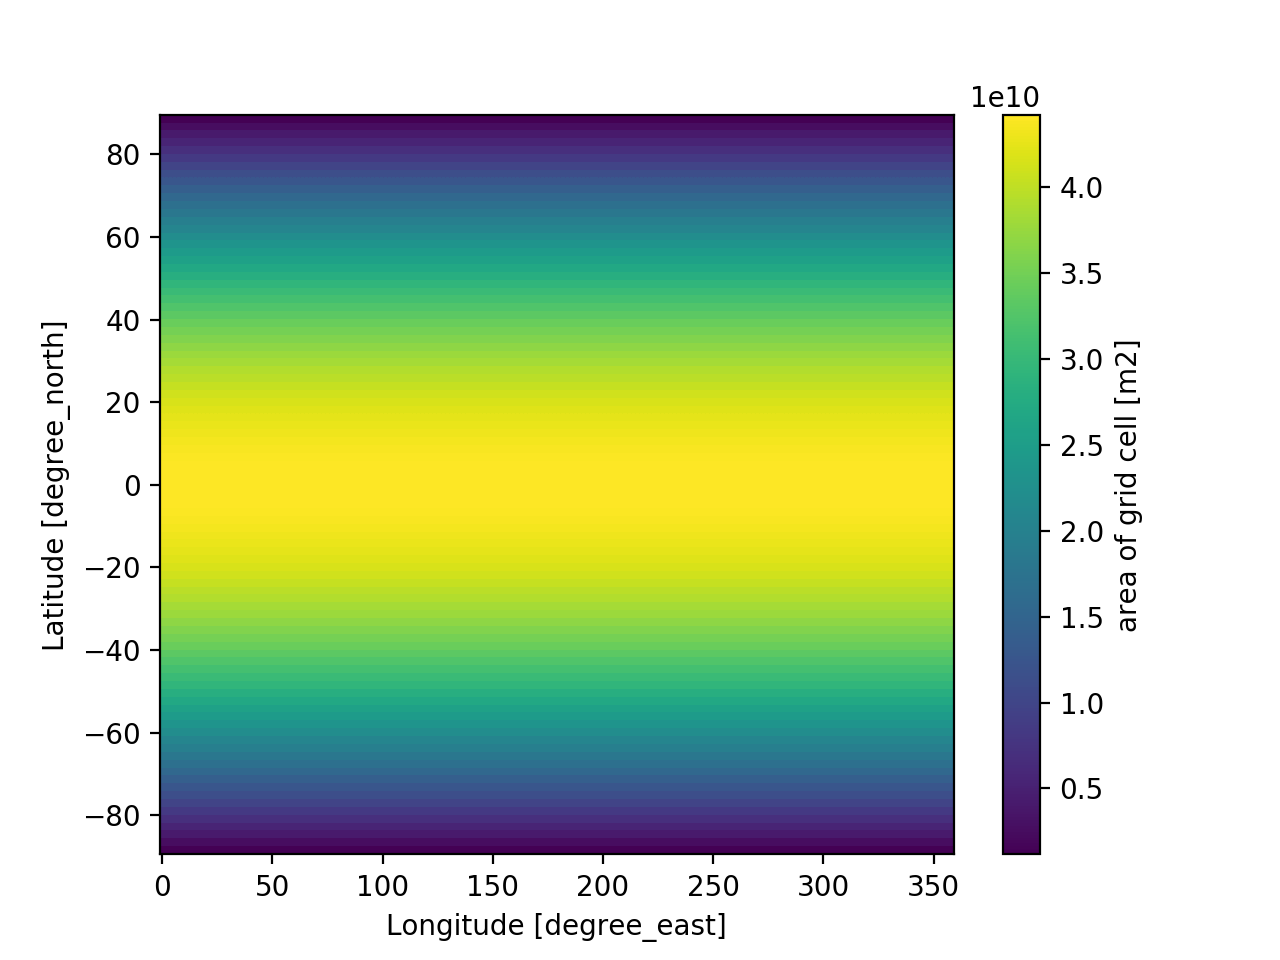

In [35]:
plt.figure()
cdo_area.plot()

In [66]:
da.lon[:-1] - da.lon[1:]

<xarray.DataArray 'lon' (lon: 190)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)
Coordinates:
  * lon      (lon) float64 1.875 3.75 5.625 7.5 ... 350.6 352.5 354.4 356.2
    time     da

## Petits artefacts dans CDO ?

<IPython.core.display.Javascript object>


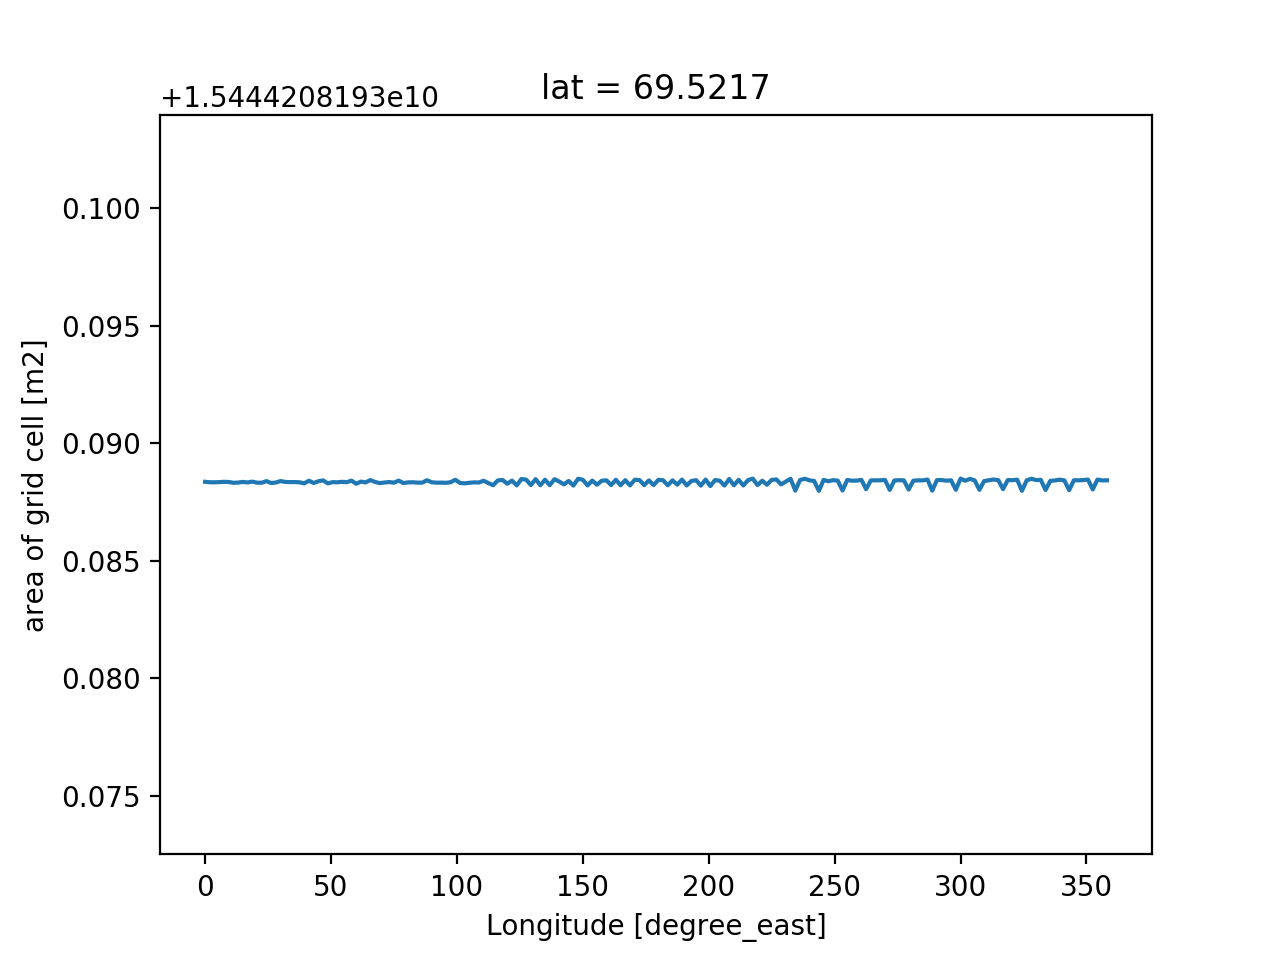

In [70]:
plt.figure()
cdo_area[10].plot()

<IPython.core.display.Javascript object>


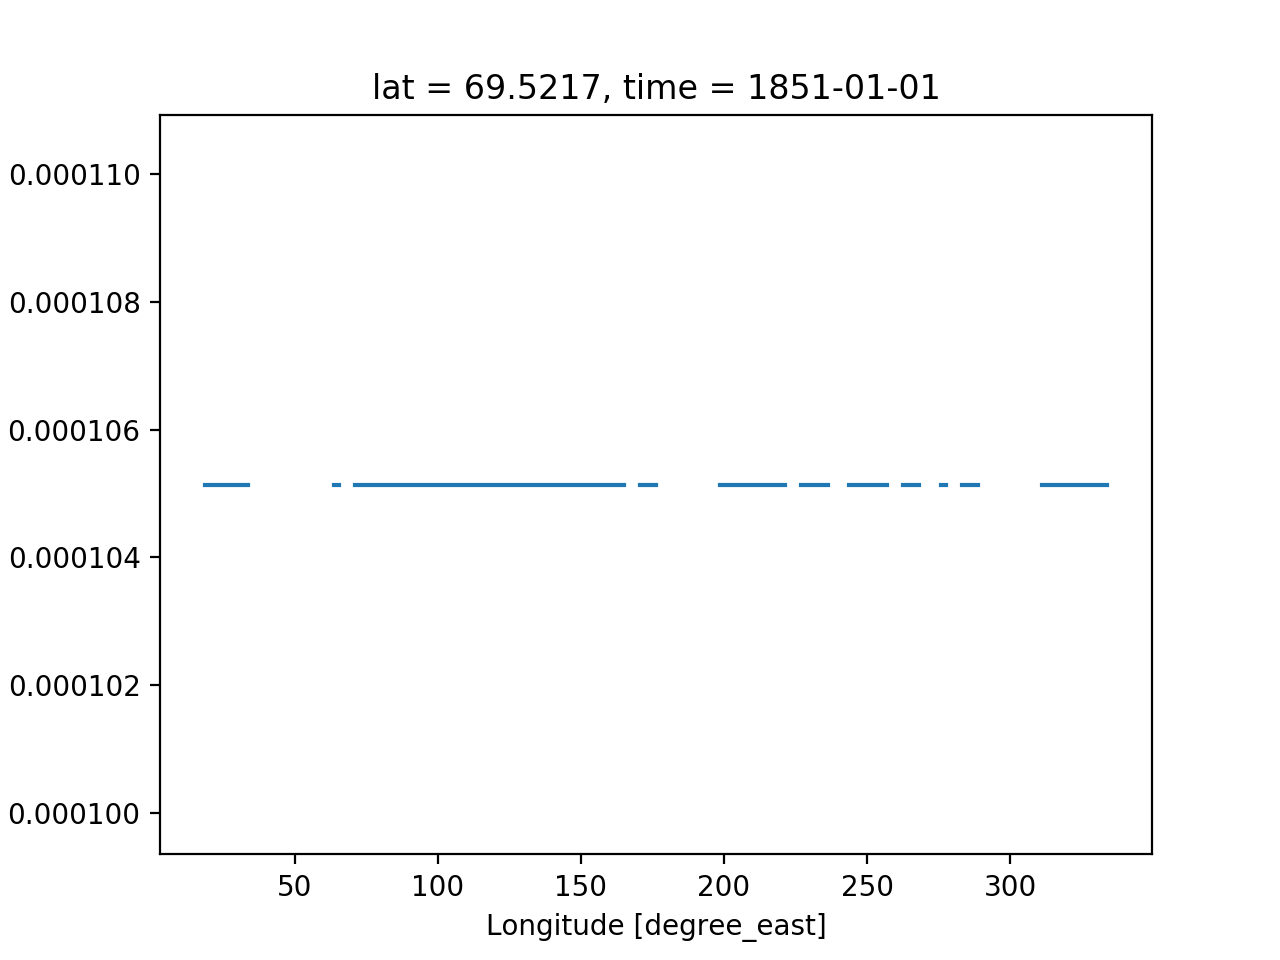

In [73]:
plt.figure()
weights[10].plot()

<IPython.core.display.Javascript object>


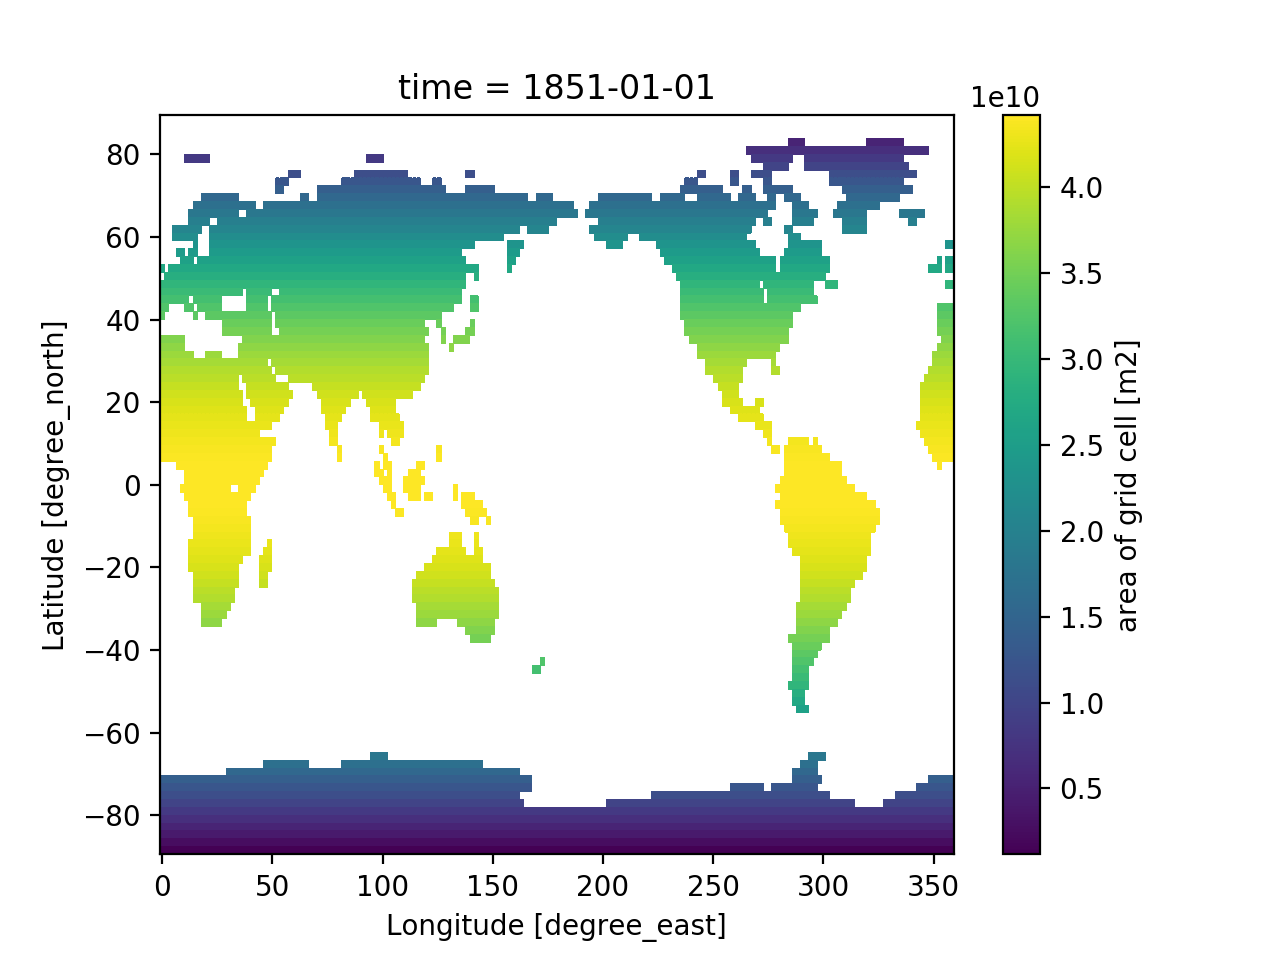

In [41]:
plt.figure()
(cdo_area.where(~da.isnull())).plot()

In [44]:
cdo_area_norm = cdo_area.where(~da.isnull())/cdo_area.where(~da.isnull()).sum()

<IPython.core.display.Javascript object>


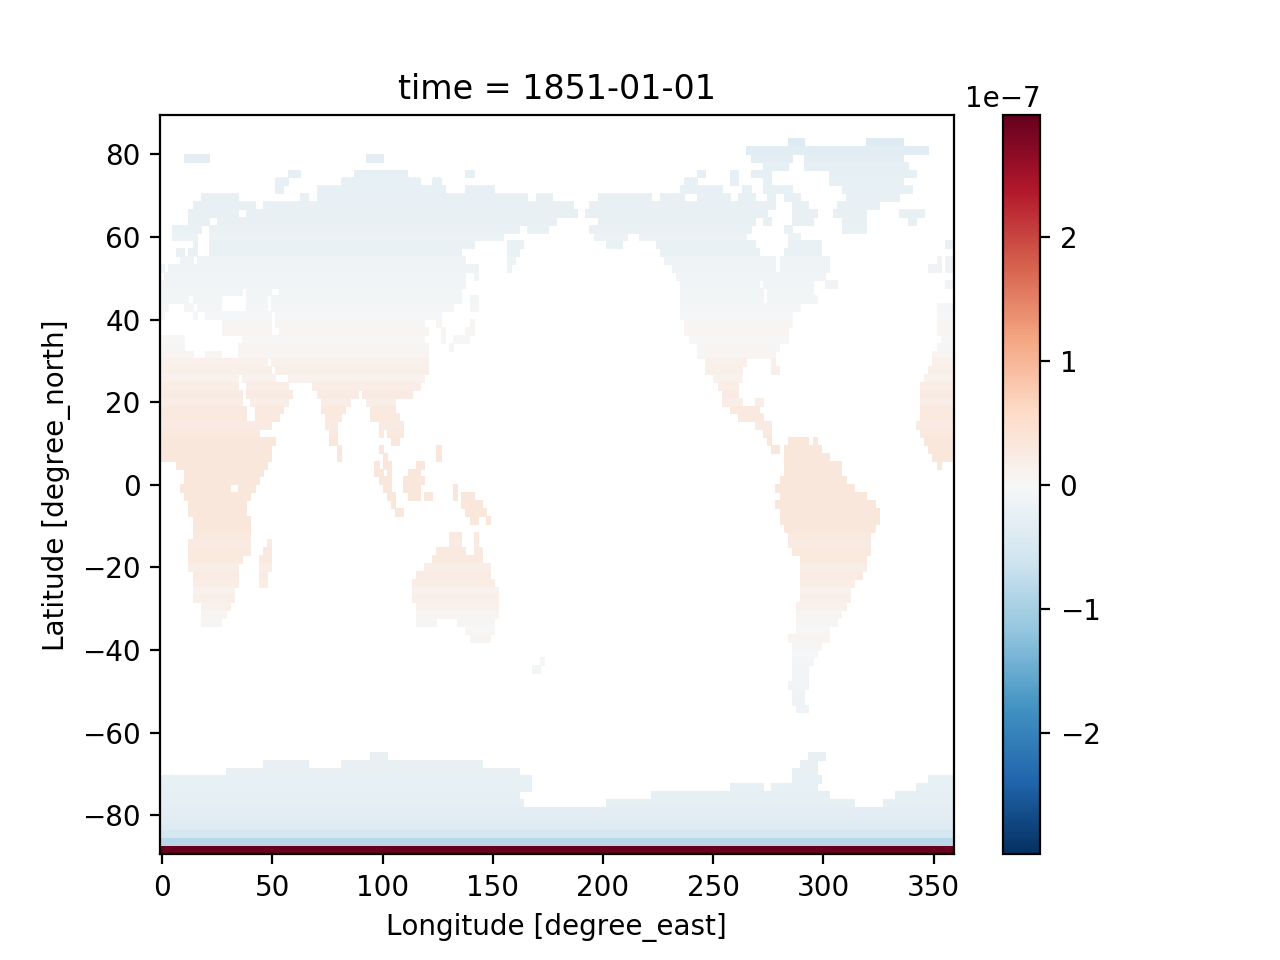

In [45]:
plt.figure()
(cdo_area_norm - weights).plot()

In [49]:
(da * cdo_area_norm).sum(dim=('lat','lon'))

<xarray.DataArray ()>
array(39.73225576)
Coordinates:
    time     datetime64[ns] 1851-01-01

In [51]:
(da * weights).sum(dim=('lat','lon'))

<xarray.DataArray ()>
array(39.736206, dtype=float32)
Coordinates:
    time     datetime64[ns] 1851-01-01